In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os.path as osp

In [3]:
with open('../paper_analysis_notebooks/OUTPUT_DIR.txt','r+') as f:
    OUTPUT_ROOT = f.readlines()[0]

OUTPUT_DIR = osp.join(OUTPUT_ROOT, 'synthetic')

In [4]:
res = pd.read_csv(osp.join(OUTPUT_DIR, 'results.csv'), header = 0, index_col = 0)

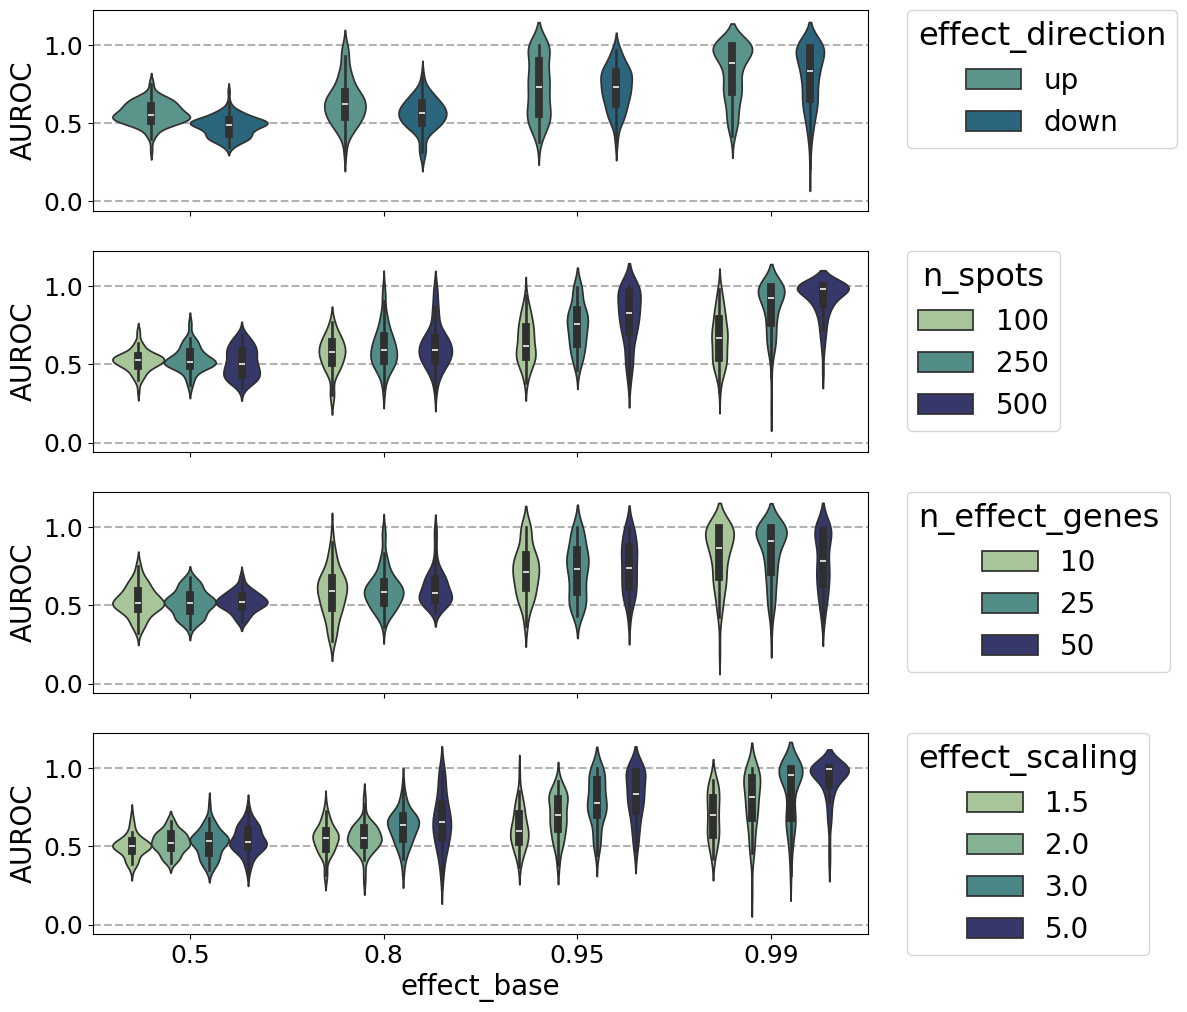

In [12]:
palette = 'crest'

fig, ax = plt.subplots(4,1, figsize = (10,12), sharex = True, sharey = True)
ax = ax.flatten()

for hue,axx in zip(['effect_direction','n_spots','n_effect_genes','effect_scaling'],ax):
    sns.violinplot( res, x = 'effect_base', y = 'score', hue = hue, ax = axx, palette =  palette)
    for li in [0,0.5,1]:
        axx.axhline(y = li, color = 'black', linestyle = 'dashed', zorder = -100, alpha = 0.3,)
        axx.set_ylabel('AUROC',fontsize = 20)
        axx.set_xlabel('effect_base',fontsize = 20)
        axx.tick_params(axis='x', labelsize=18)
        axx.tick_params(axis='y', labelsize=18)


    # Move the legend outside the plot
    legend = axx.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize = 20,title_fontsize = 23)
    legend.set_title(hue)